In [ ]:
pip install shap

In [ ]:
pip install xgboost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import shap

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

In [3]:
data = pd.DataFrame(train)
data2 =pd.DataFrame(test)
data

,eventNumber,runNumber,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,...,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1,index
0,87834187,300000,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,18,3,...,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594,0
1,84862668,300000,35.500000,35.500000,35.500000,35.500000,35.500000,35.500000,23,4,...,36774.925781,58228.847656,412.321869,10861.282227,37433.324219,61805.964844,460.203613,10861.282227,37433.324219,1
2,20869557,300000,29.490000,29.490000,29.490000,29.490000,29.490000,29.490000,20,3,...,23413.427734,38875.042969,3492.513672,5705.863281,23728.701172,40497.234375,3333.052734,5705.863281,23728.701172,2
3,42161877,300000,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,17,2,...,27372.955078,104002.000000,921.178040,0.000000,27101.673828,106995.789062,1127.115356,0.000000,27101.673828,3
4,82761614,300000,59.500000,59.500000,59.500000,59.500000,59.500000,59.500000,33,7,...,45745.859375,87924.406250,-75.167221,0.000000,45947.109375,93710.968750,-188.182098,0.000000,45947.109375,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162495,87753440,300000,59.500000,59.500000,59.500000,59.500000,59.500000,59.500000,34,2,...,35473.875000,86889.070312,867.511475,1120.453857,36521.750000,88872.992188,748.347656,1120.453857,36521.750000,162495
162496,7746045,300000,11.490000,11.490000,11.490000,11.490000,11.490000,11.490000,10,4,...,36722.617188,79933.289062,352.093262,0.000000,36812.964844,83049.414062,665.589417,0.000000,36800.929688,162496
162497,85994391,300000,44.490002,44.490002,44.490002,44.490002,44.490002,44.490002,28,5,...,26506.359375,52808.492188,287.444580,7824.405273,26847.457031,53551.433594,-13.175649,7824.405273,26847.457031,162497
162498,9886827,300000,20.490000,20.490000,20.490000,20.490000,20.490000,20.490000,14,1,...,46398.742188,134187.593750,1426.328613,0.000000,46656.253906,137266.218750,1512.928101,0.000000,46656.253906,162498


In [4]:
data.shape

(162500, 166)

In [5]:
data2

,eventNumber,runNumber,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,...,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1,index
0,82715785,300000,55.500000,55.500000,55.500000,55.500000,55.500000,55.500000,25,3,...,31315.462891,34428.593750,-114.604591,7236.436523,31362.933594,35057.257812,-323.635437,7236.436523,31362.933594,0
1,87776805,300000,34.490002,34.490002,34.490002,34.490002,34.490002,34.490002,17,2,...,11161.533203,18553.693359,164.311783,25511.509766,10993.912109,19125.595703,-31.031605,25511.509766,11126.732422,1
2,88374971,300000,10.500000,10.500000,10.500000,10.500000,10.500000,10.500000,7,2,...,38468.578125,168862.281250,1686.837524,0.000000,38595.757812,173636.875000,1568.235352,0.000000,38578.878906,2
3,90188646,300000,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,20,3,...,39400.394531,47991.351562,254.431152,11802.980469,39751.097656,49673.574219,1032.851807,11802.980469,39751.097656,3
4,33479601,300000,40.500000,40.500000,40.500000,40.500000,40.500000,40.500000,31,7,...,31813.449219,66441.101562,2146.472168,8995.112305,32713.642578,70718.359375,2927.506104,8995.112305,32647.580078,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160646,83224363,300000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,10,4,...,57191.355469,144228.375000,709.250000,0.000000,57082.277344,150338.828125,857.790405,0.000000,57082.277344,160646
160647,7755019,300000,23.500000,23.500000,23.500000,23.500000,23.500000,23.500000,11,2,...,26484.082031,109270.625000,583.594971,0.000000,30521.910156,121041.343750,1390.935059,0.000000,30521.910156,160647
160648,30078874,300000,24.490000,24.490000,24.490000,24.490000,24.490000,24.490000,10,1,...,15322.294922,100385.117188,5082.523438,0.000000,16207.693359,102540.796875,5203.945801,0.000000,16207.693359,160648
160649,21433700,300000,45.500000,45.500000,45.500000,45.500000,45.500000,45.500000,26,7,...,32152.722656,41132.343750,542.427185,18163.388672,33373.300781,44453.101562,953.256653,18163.388672,33373.300781,160649


In [6]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [7]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 
                 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 
                 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 
                 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 
                 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 
                 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster',
                 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta',
                 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits',
                 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof',
                 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG',
                 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1',
                 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 
                 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 
                 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 
                 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 
                 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 
                 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 
                 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 
                 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 
                 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2',
                 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1',
                 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [8]:
X = train[all_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')
print(y)

Shape of X: (162500, 160)
Shape of y: (162500,)
0          True
1         False
2         False
3          True
4          True
          ...  
162495     True
162496     True
162497     True
162498    False
162499    False
Name: Truth, Length: 162500, dtype: bool


# Import DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(min_samples_leaf = 20, criterion = 'entropy')

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train,plot_type='bar')

In [11]:
shap_variables = ['p_sigmad0', 'p_Rhad', 'p_Rphi', 'p_Reta', 'p_ethad', 'p_deltaEta1', 'p_Rhad1', 'p_deltaPhiRescaled2', 'p_ambiguityType', 
                  'p_ptconecoreTrackPtrCorrection', 'p_nTracks', 'p_d0', 'p_numberOfInnermostPixelHits', 'p_d0Sig', 'p_numberOfPixelHits', 'p_dPOverP', 'p_numberOfSCTHits', 'p_deltaPhi2', 'p_EptRatio', 'p_E7x11_Lr3', 'p_pt_track', 'p_nCells_Lr1_HiG', 'p_TRTPID', 'p_deltaPhiFromLastMeasurement', 'p_Eratio']

## We are keeping 25 variables as taken from the shap

In [12]:
X_fin = train[shap_variables]
y_fin = train['Truth']

In [13]:
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(X_fin, y_fin, test_size=0.33, random_state=42)

In [14]:
model_fin = DecisionTreeClassifier(min_samples_leaf = 20, criterion = 'entropy', max_depth=8)

In [15]:
model_fin.fit(np.array(X_train_fin),np.array(y_train_fin))

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=20)

In [16]:
predictions_fin = model_fin.predict_proba(X_test_fin)

predictions_fin = pd.DataFrame(predictions_fin)
predictions_fin.columns = ["not an electron", "it is an electron"]
predictions_fin = predictions_fin["it is an electron"]
predictions_fin.to_csv('Classification_IoannisMageiras_DecisionTreeClassifier.txt', sep = ',', header = None, index = True, mode = 'a')

# Predictions on the test file

In [24]:
testData = test[shap_variables]

In [29]:
predict_test = model_fin.predict_proba(testData)
predict_test = pd.DataFrame(predict_test)
predict_test.columns = ["not an electron", "it is an electron"]
predict_test = predict_test["it is an electron"]
print(predict_test)
predict_test.to_csv('Classification_IoannisMageiras_DecisionTreeClassifierTEST.txt', sep = ',', header = None, index = True, mode = 'a')

0         0.992269
1         0.807994
2         0.992269
3         0.992269
4         0.952572
            ...   
160646    0.576340
160647    0.576340
160648    0.375000
160649    0.000000
160650    0.992269
Name: it is an electron, Length: 160651, dtype: float64


In [ ]:
#model_fin.predict([[0.00005,0.500,0.0000600,0.000500,0.000600,0.00700,0.000800,0.00900,0.00010,0.0001100,0.001200000,0.000130000,0.0014000,150000,16000]])

Text(0.8, 0.6, '$our model$ = 0.960')

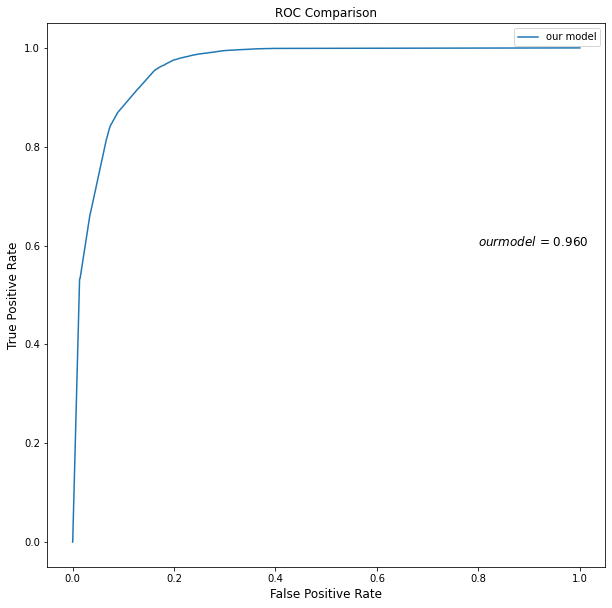

In [21]:
fpr, tpr, _ = roc_curve(y_test_fin, predictions_fin)  ## this calculates the false positive rate and the true positive rate


## Calculate the AUC values of the Roc curves
auc_score = auc(fpr,tpr)
### Now we can plot the results

fig = plt.figure(figsize=[10,10])
plt.title("ROC Comparison", size = 12)
plt.plot(fpr,tpr,label="our model")
plt.legend()
plt.xlabel("False Positive Rate",size=12)
plt.ylabel("True Positive Rate",size = 12)

### We can also plot the values auc
plt.text(0.8, 0.6, r"$our model$ = {:.3f}".format(auc_score), fontsize=12)

## Using Xgboost

In [30]:
X_train_shap_fin = xgb.DMatrix(X_train_fin, label = y_train_fin)

X_test_shap_fin = xgb.DMatrix(X_test_fin, label = y_test_fin)

In [31]:
params_fin = {"objective":"binary:logistic","learning_rate": 0.01, "max_depth":5, 'alpha': 3, 'colsample_bytree': 0.5, 'eval_metric': 'logloss',
             'seed': 42}

number_of_boost = 10000
early_stopping = 10
verb_evals = 20

modelxgb_fin = xgb.train(params=params_fin, dtrain=X_train_shap_fin,  evals=[(X_train_shap_fin,'Train'),(X_test_shap_fin,'Validation')], 
                      num_boost_round = number_of_boost, early_stopping_rounds = early_stopping, verbose_eval = verb_evals)

[0]	Train-logloss:0.68666	Validation-logloss:0.68671
[20]	Train-logloss:0.56196	Validation-logloss:0.56346
[40]	Train-logloss:0.47222	Validation-logloss:0.47480
[60]	Train-logloss:0.40543	Validation-logloss:0.40898
[80]	Train-logloss:0.35480	Validation-logloss:0.35915
[100]	Train-logloss:0.31559	Validation-logloss:0.32063
[120]	Train-logloss:0.28493	Validation-logloss:0.29056
[140]	Train-logloss:0.26051	Validation-logloss:0.26667
[160]	Train-logloss:0.24105	Validation-logloss:0.24768
[180]	Train-logloss:0.22526	Validation-logloss:0.23233
[200]	Train-logloss:0.21242	Validation-logloss:0.21989
[220]	Train-logloss:0.20187	Validation-logloss:0.20977
[240]	Train-logloss:0.19318	Validation-logloss:0.20148
[260]	Train-logloss:0.18593	Validation-logloss:0.19461
[280]	Train-logloss:0.17977	Validation-logloss:0.18874
[300]	Train-logloss:0.17458	Validation-logloss:0.18386
[320]	Train-logloss:0.17015	Validation-logloss:0.17971
[340]	Train-logloss:0.16640	Validation-logloss:0.17625
[360]	Train-logl

[2960]	Train-logloss:0.11023	Validation-logloss:0.14219
[2978]	Train-logloss:0.11009	Validation-logloss:0.14217


In [32]:
y_pred_fin = modelxgb_fin.predict(X_test_shap_fin)# don't use: , output_margin = True), it fucks up the output

predictions_fin = pd.DataFrame(y_pred_fin)

#predictions_fin.to_csv('Classification_IoannisMageiras_XGBoostClassifier.txt', sep = ',', header = None, index = True, mode = 'a')

In [ ]:
predictxgb_test = modelxgb_fin.predict_proba(testData)
predictxgb_test = pd.DataFrame(predictxgb_test)
predictxgb_test.columns = ["not an electron", "it is an electron"]
predictxgb_test = predictxgb_test["it is an electron"]
print(predictxgb_test)
predictxgb_test.to_csv('Classification_IoannisMageiras_XGBoostTEST.txt', sep = ',', header = None, index = True, mode = 'a')

In [ ]:
fpr2, tpr2, _ = roc_curve(y_test_fin, predictions_fin)  ## this calculates the false positive rate and the true positive rate


## Calculate the AUC values of the Roc curves
auc_score2 = auc(fpr2,tpr2)
### Now we can plot the results

fig = plt.figure(figsize=[10,10])
plt.title("ROC", size = 12)
plt.plot(fpr2,tpr2,label="XGBoost")
plt.plot(fpr,tpr,label="ClassicDecisionTree")
plt.legend()
plt.xlabel("False Positive Rate",size=12)
plt.ylabel("True Positive Rate",size = 12)

### We can also plot the values auc
plt.text(0.5, 0.6, r"$auc-score-ClassicDesicionTree$ = {:.3f}".format(auc_score), fontsize=12)
plt.text(0.6, 0.5, r"$auc-score-XGBoost$ = {:.3f}".format(auc_score2), fontsize=12)